In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [7]:
iris = load_iris();
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species']=iris.target
data['species']=data['species'].replace(dict(enumerate(iris.target_names)))
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [8]:
X = iris.data[:, [0, 1]]
k = 3
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [9]:
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, False)]
print(centroids)

[[6.1 2.8]
 [5.7 3.8]
 [7.7 2.6]]


In [10]:
def closest_centroids(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis = 2))
    return np.argmin(distances, axis = 0)

def compute_centroid(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [11]:
for _ in range(100):
    labels = closest_centroids(X, centroids)
    new_centroids = compute_centroid(X, labels, k)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

In [12]:
print("Final Centroid:\n ", centroids)

Final Centroid:
  [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]


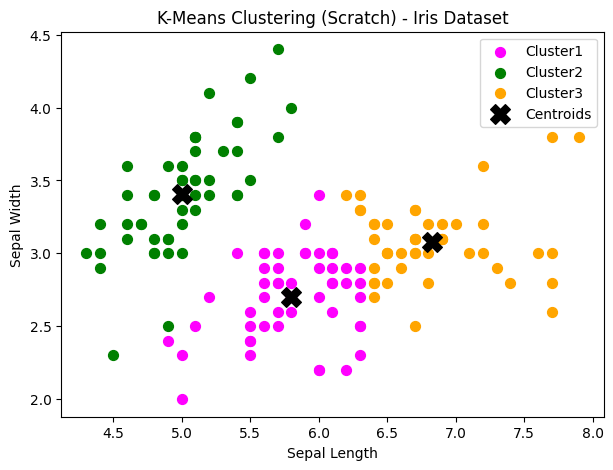

In [13]:
plt.figure(figsize=(7, 5))
colors = ['magenta', 'green', 'orange']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, color=colors[i], label=f'Cluster{i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering (Scratch) - Iris Dataset')
plt.legend()
plt.show()

In [14]:
import math
import random
import pandas
import matplotlib.pyplot as plt

In [15]:
def distance(p1, p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i] - p2[i]) ** 2
    return math.sqrt(total)


In [16]:
def mean(points):
    n = len(points)
    dims = len(points[0])
    result = []
    for i in range(dims):
        s = 0
        for j in range(n):
            s += points[j][i]
        result.append(s/n)
    return result

In [17]:
def kmeans(data, k, max_iters = 100):
    centroids = random.sample(data, k)
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = []
            for c in centroids:
                d = distance(point, c)
                distances.append(d)
            min_index = distances.index(min(distances))
            clusters[min_index].append(point)
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_c = mean(cluster)
            else:
                new_c = random.choice(data)
            new_centroids.append(new_c)

        if new_centroids == centroids:
            break
        centroids = new_centroids
    return centroids, clusters
        

In [30]:
df = pd.read_csv('data.csv')
print(df)
data = df.values.tolist()
print(data)

      1     2
0   1.5   1.8
1   1.2   1.1
2   0.8   1.5
3   1.1   0.9
4   1.3   1.4
5   0.9   0.6
6   1.6   1.2
7   1.4   0.8
8   0.7   1.0
9   1.0   0.6
10  1.8   1.5
11  0.6   0.9
12  1.2   1.7
13  1.9   1.1
14  5.0   8.0
15  5.5   8.2
16  4.8   7.9
17  5.2   8.5
18  4.9   8.1
19  5.1   7.6
20  5.6   8.8
21  4.7   7.4
22  5.3   8.0
23  5.0   8.9
24  4.6   7.8
25  5.4   8.3
26  5.7   7.7
27  4.9   8.6
28  5.2   7.5
29  8.0   8.0
30  8.3   8.1
31  7.8   7.9
32  8.5   8.4
33  7.6   8.2
34  8.1   7.6
35  8.7   8.9
36  7.9   8.5
37  8.4   7.8
38  7.7   7.5
39  8.2   8.6
40  9.0  11.0
41  9.3  11.2
42  8.8  10.9
43  9.5  11.5
44  8.9  11.1
45  9.1  10.6
46  9.6  11.8
[[1.5, 1.8], [1.2, 1.1], [0.8, 1.5], [1.1, 0.9], [1.3, 1.4], [0.9, 0.6], [1.6, 1.2], [1.4, 0.8], [0.7, 1.0], [1.0, 0.6], [1.8, 1.5], [0.6, 0.9], [1.2, 1.7], [1.9, 1.1], [5.0, 8.0], [5.5, 8.2], [4.8, 7.9], [5.2, 8.5], [4.9, 8.1], [5.1, 7.6], [5.6, 8.8], [4.7, 7.4], [5.3, 8.0], [5.0, 8.9], [4.6, 7.8], [5.4, 8.3], [5.7, 7.7], [4.

In [31]:
final_centroids, final_clusters = kmeans(data, k=3)

In [32]:
print("Final Centroids: ")
for c in final_centroids:
    f_c = [round(val, 2) for val in c]
    print(f_c)

Final Centroids: 
[8.52, 9.31]
[1.21, 1.15]
[5.13, 8.09]


In [33]:
print("\n Cluster: ")
for i, cluster in enumerate(final_clusters):
    print("Cluster: ", i+1, ":", cluster)


 Cluster: 
Cluster:  1 : [[8.0, 8.0], [8.3, 8.1], [7.8, 7.9], [8.5, 8.4], [7.6, 8.2], [8.1, 7.6], [8.7, 8.9], [7.9, 8.5], [8.4, 7.8], [7.7, 7.5], [8.2, 8.6], [9.0, 11.0], [9.3, 11.2], [8.8, 10.9], [9.5, 11.5], [8.9, 11.1], [9.1, 10.6], [9.6, 11.8]]
Cluster:  2 : [[1.5, 1.8], [1.2, 1.1], [0.8, 1.5], [1.1, 0.9], [1.3, 1.4], [0.9, 0.6], [1.6, 1.2], [1.4, 0.8], [0.7, 1.0], [1.0, 0.6], [1.8, 1.5], [0.6, 0.9], [1.2, 1.7], [1.9, 1.1]]
Cluster:  3 : [[5.0, 8.0], [5.5, 8.2], [4.8, 7.9], [5.2, 8.5], [4.9, 8.1], [5.1, 7.6], [5.6, 8.8], [4.7, 7.4], [5.3, 8.0], [5.0, 8.9], [4.6, 7.8], [5.4, 8.3], [5.7, 7.7], [4.9, 8.6], [5.2, 7.5]]


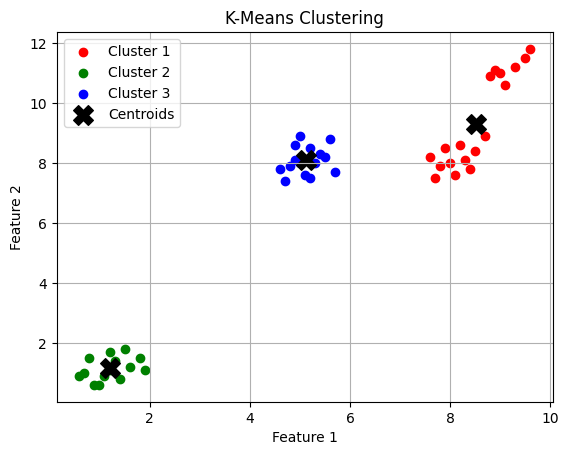

In [34]:
# --- Plotting the Clusters ---
colors = ['red', 'green', 'blue']

for i, cluster in enumerate(final_clusters):
    x_vals = [p[0] for p in cluster]
    y_vals = [p[1] for p in cluster]
    plt.scatter(x_vals, y_vals, color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
cent_x = [c[0] for c in final_centroids]
cent_y = [c[1] for c in final_centroids]

plt.scatter(cent_x, cent_y, color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()